# curating  data for an area of interest (CONUS)

# Import general packages


In [1]:
import stitches as stitches


import pandas as pd
import pkg_resources
import xarray as xr
import numpy as np
import seaborn as sns

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")
# For help with plotting
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6
pd.set_option('display.max_columns', None)

# import packages for spatial masking

In [2]:
import geopandas as gpd
# Spatial subsetting of netcdf files:
import regionmask

#  Set up time slices and area of interest (AOI) to focus on

- require ensemble average PR values over the ref period and comparison period
for an area of interest
- Do spatial aggregation for each ensemble member, take the time average in the
time window, calculate average across ensemble members

In [3]:
# Time slices
ref_start = '1995-01-01'
ref_end =  '2014-12-31'

comp_start = '2015-01-01'
comp_end =  '2099-12-31'

window_length = 20

In [4]:
# AOI
# working off https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/subset-netcdf4-climate-data-spatially-aoi/

# # physical land polygon files:
# url =  (    "https://naturalearth.s3.amazonaws.com/"
# "10m_physical/ne_10m_land.zip")

# # country URL
# url =  (    "https://naturalearth.s3.amazonaws.com/"
#             "10m_cultural/ne_10m_admin_0_countries.zip")

# state/province URL
url =  (    "https://naturalearth.s3.amazonaws.com/"
            "10m_cultural/ne_10m_admin_1_states_provinces.zip")


land_main_gdf = gpd.read_file(url)
land_main_gdf.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,name_local,type,type_en,code_local,code_hasc,note,hasc_maybe,region,region_cod,provnum_ne,gadm_level,check_me,datarank,abbrev,postal,area_sqkm,sameascity,labelrank,name_len,mapcolor9,mapcolor13,fips,fips_alt,woe_id,woe_label,woe_name,latitude,longitude,sov_a3,adm0_a3,adm0_label,admin,geonunit,gu_a3,gn_id,gn_name,gns_id,gns_name,gn_level,gn_region,gn_a1_code,region_sub,sub_code,gns_level,gns_lang,gns_adm1,gns_region,min_label,max_label,min_zoom,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,name_he,name_uk,name_ur,name_fa,name_zht,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 states provinces,3,ARG-1309,1309,AR-E,NaN,AR,1,Entre Ríos,Entre-Rios,NaN,Provincia,Province,NaN,AR.ER,NaN,NaN,NaN,NaN,10.0,1,20,3,NaN,ER,0.0,-99,3,10,3,13,AR08,NaN,2344682.0,"Entre Rios, AR, Argentina",Entre Ríos,-32.02750,-59.2824,ARG,ARG,2,Argentina,Argentina,ARG,3434137.0,Provincia de Entre Rios,-988655.0,Entre Rios,1.0,NaN,AR.08,NaN,NaN,1.0,khm,AR08,NaN,6.0,11.0,6.0,Q44762,إنتري ريوس,এন্ত্রে রিও প্রদেশ,Entre Ríos,Entre Ríos,Entre Ríos,Entre Ríos,Έντρε Ρίος,एन्ट्रे रियोस,Entre Ríos,Entre Ríos,Entre Ríos,エントレ・リオス州,엔트레리오스,Entre Ríos,Entre Ríos,Entre Ríos,Энтре-Риос,Entre Ríos,Entre Ríos eyaleti,Entre Ríos,恩特雷里奥斯省,1159309789,אנטרה ריוס,Ентре-Ріос,صوبہ انترے ریوس,ایالت انتره ریوز,恩特雷里奥斯省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4..."
1,Admin-1 states provinces,6,URY-8,8,UY-PA,NaN,UY,1,Paysandú,NaN,NaN,Departamento,Department,NaN,UY.PA,NaN,NaN,NaN,NaN,19.0,1,0,8,NaN,PA,0.0,-99,6,8,2,10,UY11,NaN,2347650.0,"PaysandÃº, UY, Uruguay",Paysandú,-32.09330,-57.2240,URY,URY,2,Uruguay,Uruguay,URY,3441242.0,Departamento de Paysandu,-908097.0,"Paysandu, Departamento de",1.0,NaN,UY.11,NaN,NaN,1.0,fra,UY11,NaN,8.0,11.0,8.0,Q16576,إدارة بايساندو,পেসান্ডো বিভাগ,Paysandú,Paysandú,Paysandú,Paysandú,Παϊσαντού,पयसंदु विभाग,Paysandú,Departemen Paysandú,dipartimento di Paysandú,パイサンドゥ県,파이산두,Paysandú,Paysandú,Paysandú,Пайсанду,Paysandú,Paysandu Departmanı,Paysandú,派桑杜省,1159307733,פאיסאנדו,Пайсанду,پایساندو محکمہ,بخش پایساندو,派桑杜省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-58.20012 -32.44720, -58.20011 -32.4..."
2,Admin-1 states provinces,2,IDN-1185,1185,ID-KI,NaN,ID,5,Kalimantan Timur,Kaltim,NaN,Propinsi,Province,NaN,ID.KI,NaN,NaN,NaN,NaN,15.0,1,20,1,NaN,KI,0.0,-99,2,16,6,11,ID14,NaN,2345723.0,"East Kalimantan, ID, Indonesia",Kalimantan Timur,1.28915,116.3540,IDN,IDN,2,Indonesia,Indonesia,IDN,1641897.0,Provinsi Kalimantan Timur,-2680740.0,"Kalimantan Timur, Provinsi",1.0,NaN,ID.14,NaN,NaN,1.0,ind,ID14,NaN,5.0,10.1,4.6,Q3899,كالمنتان الشرقية,পূর্ব কালিমান্তান,Ostkalimantan,East Kalimantan,Kalimantan Oriental,Kalimantan oriental,Ανατολικό Καλιμαντάν,पूर्व कालिमंतान,Kelet-Kalimantan,Kalimantan Timur,Kalimantan Orientale,東カリマンタン州,동칼리만탄,Oost-Kalimantan,Borneo Wschodnie,Kalimantan Oriental,Восточный Калимантан,Kalimantan Timur,Doğu Kalimantan,Đông Kalimantan,东加里曼丹省,1159310009,מזרח קלימנטאן,Східний Калімантан,مشرقی کالیمانتان,کالیمانتان شرقی,東加里曼丹省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
3,Admin-1 states provinces,6,MYS-1186,1186,MY-12,NaN,MY,5,Sabah,North Borneo,NaN,State,State,NaN,MY.SA,Na

<Axes: >

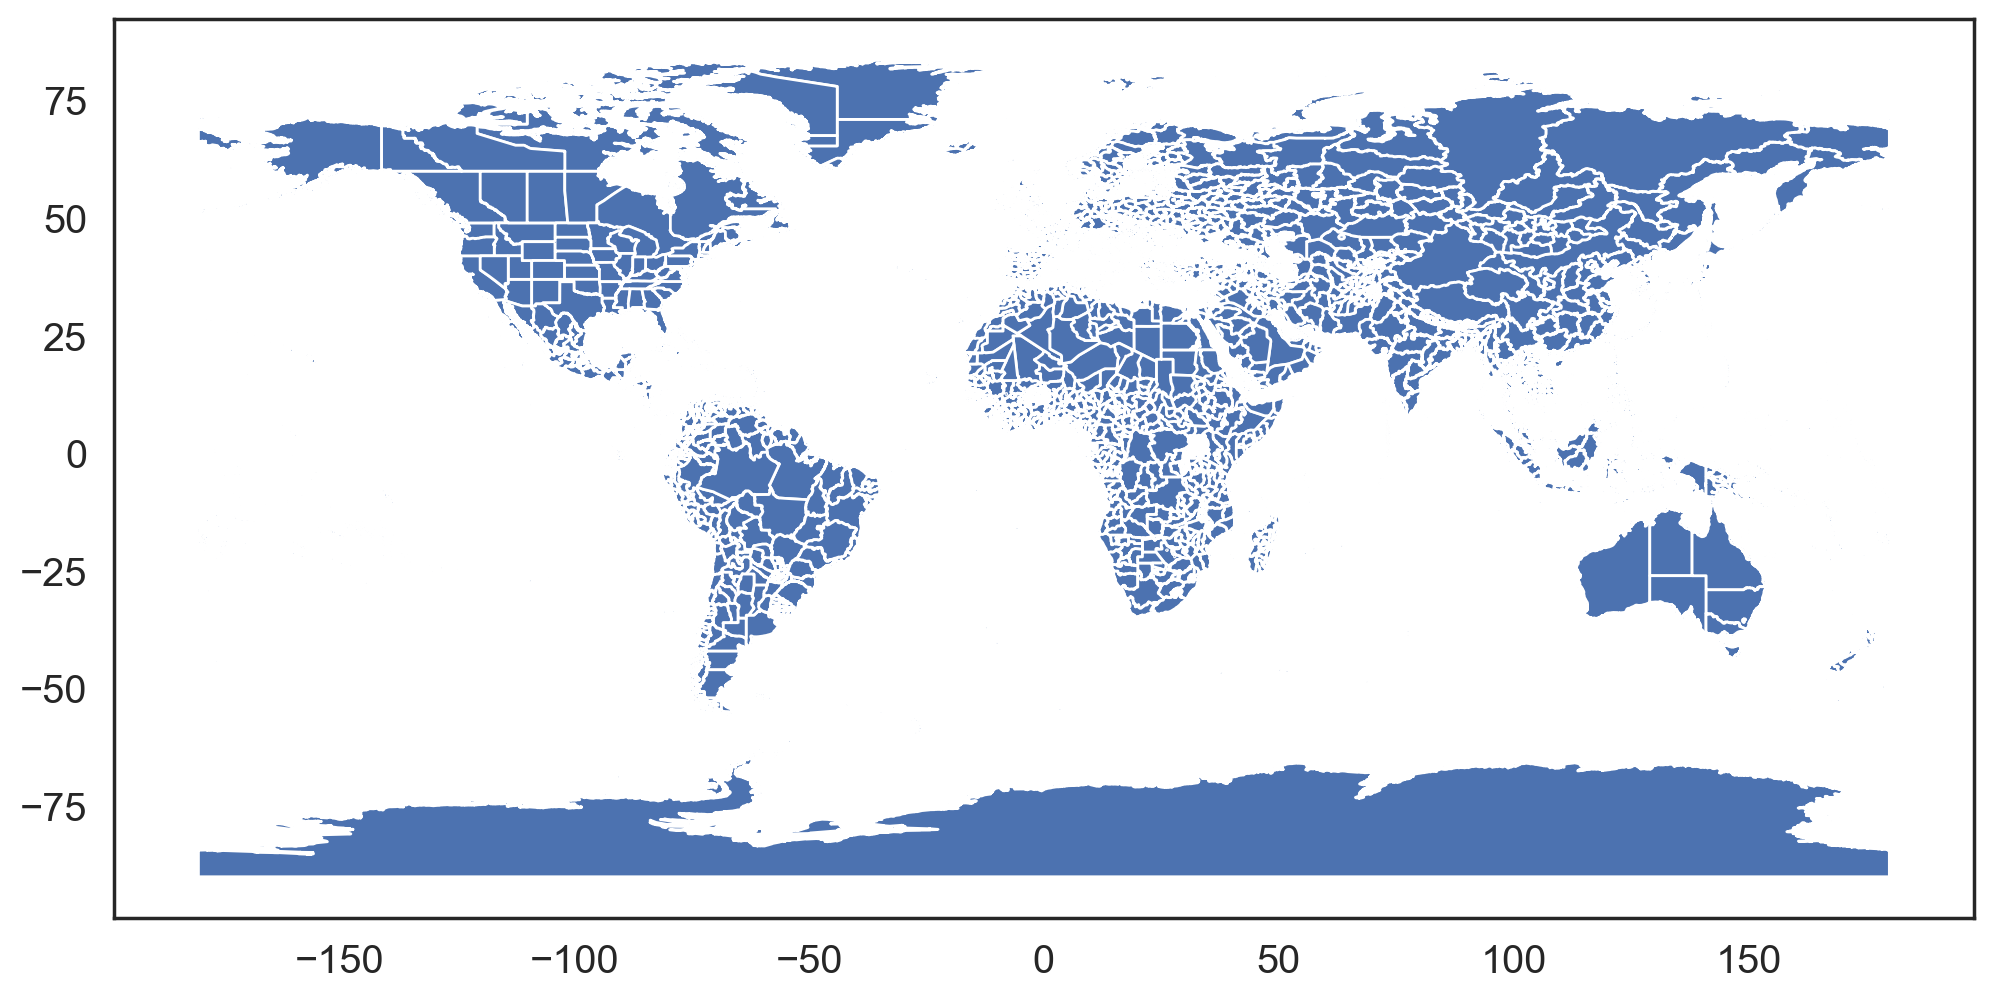

In [5]:
land_main_gdf.plot()

In [6]:
# # define conus as AOI
# aoi = land_main_gdf[(land_main_gdf['admin'] == 'United States of America')&
#                     (land_main_gdf['name'] != 'Hawaii') &
#                      (land_main_gdf['name'] != 'Alaska') ].reset_index(drop=True).copy()

# define Southwest as AOI
aoi = land_main_gdf[(land_main_gdf['admin'] == 'United States of America')&
                    #(land_main_gdf['name'] == 'California') |
                    #(land_main_gdf['name'] == 'Nevada') |
                    (land_main_gdf['name'] == 'Colorado')  |
                    (land_main_gdf['name'] == 'Utah') |
                    (land_main_gdf['name'] == 'New Mexico') |
                    (land_main_gdf['name'] == 'Arizona')].reset_index(drop=True).copy()

print(aoi.total_bounds)
# Get lat min, max
aoi_lat = [float(aoi.total_bounds[1]), float(aoi.total_bounds[3])]
aoi_lon = [float(aoi.total_bounds[0]), float(aoi.total_bounds[2])]
# The netcdf files use a global lat/lon so adjust values accordingly
aoi_lon[0] = aoi_lon[0] + 360
aoi_lon[1] = aoi_lon[1] + 360

aoi_lon, aoi_lat

[-114.82210811   31.32718455 -102.03956914   42.00007733]


([245.17789188500004, 257.96043086489254],
 [31.327184550000098, 42.000077329804924])

# specify ESMs, variables, experiments

In [7]:
# The CMIP6 ESM we want to emulate and the variables we want to
# emulate
# NOTE IPSL and GFDL submitted results under grids labeled not `gn` so they
# are not included in the stitches patches data. To pull their ESMs, we have to
# source the pangeo table directly from pangeo and reshape it instead of using
# the stitches package data.


esm = ['CAMS-CSM1-0', 'MIROC6', 'GFDL-ESM4', 'FGOALS-g3',
'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0',
'ACCESS-ESM1-5', 'IPSL-CM6A-LR', 'CESM2-WACCM',
'UKESM1-0-LL',
'CanESM5']

vars1 = ['pr']

exps = ['historical','ssp126', 'ssp245', 'ssp370',  'ssp585',
        'ssp460', 'ssp119',   'ssp434', 'ssp534-over']

# Pull pangeo dataframe with netcdf addresses for above

In [8]:
# pangeo table of ESMs for reference
pangeo_data = stitches.fx_pangeo.fetch_pangeo_table()

pangeo_data = pangeo_data[(pangeo_data['source_id'].isin(esm)) &
                           (pangeo_data['variable_id'].isin(vars1)) &(pangeo_data['table_id'] == 'Amon')&
                           ((pangeo_data['experiment_id'].isin(exps)))].copy()

# reshape to look like package data but with the ESMs we want to include
pangeo_data = pangeo_data[["source_id", "experiment_id", "member_id", "variable_id", "grid_label",
                                                        "zstore", "table_id"]].copy()
pangeo_data = pangeo_data.rename(columns={"source_id": "model", "experiment_id": "experiment",
                                                "member_id": "ensemble", "variable_id": "variable",
                                                "zstore": "zstore", "table_id": "domain"}).reset_index(drop = True).copy()

 # keep only p1 runs:
# UK model only does f2 runs for some reason
ukesm_data =  pangeo_data[pangeo_data['model'].str.contains('UKESM')].copy()
ukesm_data = ukesm_data[ukesm_data['ensemble'].str.contains('i1p1f2')].copy()

# everyone else does f1 runs
pangeo_data = pangeo_data[pangeo_data['ensemble'].str.contains('i1p1f1')].copy()

# combine UKESM with other models
pangeo_data = pd.concat([pangeo_data, ukesm_data]).reset_index(drop=True).copy()


# loop over files and do calculations

In [ ]:
varname = vars1[0]

holder = pd.DataFrame()
timeseries_holder = pd.DataFrame()

for esmname in esm:
  for exp in exps:

    print(esmname)
    print(exp)
    df_ens_avg = 0

    filelist = pangeo_data[(pangeo_data['model'] ==esmname) & (pangeo_data['experiment'] == exp)].copy()

    if filelist.empty:
        print('no ensemble members for this exp')
        df_shaped =  pd.DataFrame({'esm':[esmname]})
        df_shaped['experiment'] = exp
        df_shaped['ens_avg']= -999
        df_shaped['ens_avg_iasd'] = -999
        df_shaped['ens_avg_sd'] = -999
        # end if no files for experiment

    if not filelist.empty:
        df_sum = 0
        df_iav_sum = 0
        df_sd_sum = 0
        n_good_files = 0

        for i in range(len(filelist)):
            print(i)

            # Load data:
            x = stitches.fx_pangeo.fetch_nc(filelist.iloc[i].zstore)
            x = x.sortby('time').copy()

            # If it's the first ensemble member, set up the mask
            if (i==0):
                aoi_mask = regionmask.mask_3D_geopandas(aoi,
                                                        x.lon,
                                                        x.lat)
                # end if i==0 set up aoi_mask

            # mask the file
            x = x.sel(lon = slice(aoi_lon[0], aoi_lon[1]),
                      lat = slice(aoi_lat[0], aoi_lat[1])).where(aoi_mask).copy()

            # If the experiment is historical, further slice to reference years.
            # Otherwise, slice to comparison years:
            if (exp == 'historical'):
                if(esmname == 'UKESM1-0-LL'):
                    x = x.sel(time=slice(ref_start, '2014-12-30')).copy()
                if(esmname != 'UKESM1-0-LL'):
                    x = x.sel(time=slice(ref_start, ref_end)).copy()

            if(exp!='historical'):
                if(esmname == 'UKESM1-0-LL'):
                    x = x.sel(time=slice(comp_start, '2099-12-30')).copy()
                if(esmname != 'UKESM1-0-LL'):
                    x = x.sel(time=slice(comp_start, comp_end)).copy()

                # end if checks for time slicing

            # Check if there are the correct number of time steps in this
            # sliced data:
            # Very rough QC for checking complete netcdfs and assumes
            # comparison window and reference window same length.
            if (len(x.time) >= 12*window_length):
                # coerce to DF so we can properly lat weight to do spatial aggregation:
                x1 = x[varname].to_dataframe().dropna().reset_index().drop(['region'],
                                                                     axis=1).reset_index(drop=True).copy()

                # spatial aggregation:
                monthly_aoi = pd.DataFrame()
                for name, group in x1.groupby('time'):
                    lat = group['lat']
                    area = np.cos(np.deg2rad(lat))
                    df = pd.DataFrame({'time': group['time'].drop_duplicates()})
                    df['aggregate'] = sum(area * group[varname])/sum(area)
                    monthly_aoi = pd.concat([monthly_aoi, df]).reset_index(drop=True).copy()
                    del(df)
                    del(area)
                    del(lat)
                    # end for loop over months to do spatial disaggregation

                # time average for this ensemble member:
                monthly_aoi['year'] = monthly_aoi['time'].apply(lambda x: x.year).copy()
                annual_aoi = pd.DataFrame({'year': monthly_aoi['year'].drop_duplicates(),
                                           'ann_agg':monthly_aoi.groupby('year')['aggregate'].mean().values}).reset_index(drop=True).copy()
                aoi_val = annual_aoi['ann_agg'].mean()
                aoi_sd = annual_aoi['ann_agg'].std()
                aoi_ia_sd = annual_aoi.diff()['ann_agg'].std()

                annual_aoi['esm'] = filelist.iloc[i].model
                annual_aoi['experiment'] =  filelist.iloc[i].experiment
                annual_aoi['ensemble'] = filelist.iloc[i].ensemble
                annual_aoi['variable'] = filelist.iloc[i].variable
                timeseries_holder = pd.concat([timeseries_holder, annual_aoi]).reset_index(drop=True).copy()
                del(annual_aoi)

                # and add it to the running sum for the ensemble members
                df_sum = (aoi_val  + df_sum)
                df_iav_sum = (aoi_ia_sd + df_iav_sum)
                df_sd_sum = (aoi_sd + df_sd_sum)
                n_good_files = n_good_files + 1

                # end check if is complete data file and subsequent aggregations

            # end for loop over file list

        # Calculate the ensemble average of CONUS 20 year average precip for this
        # experiment
        df_shaped =  pd.DataFrame({'esm':[esmname]})
        df_shaped['experiment'] = exp
        df_shaped['ens_avg']= df_sum/n_good_files
        df_shaped['ens_avg_iasd'] = df_iav_sum/n_good_files
        df_shaped['ens_avg_sd'] = df_sd_sum/n_good_files
        del(df_sum)
        del(df_iav_sum)
        del(df_sd_sum)
        del(n_good_files)
        # end if file list not empty


    # and append to the pr holding data frame
    df_shaped['var'] = varname
    holder = pd.concat([holder, df_shaped]).reset_index(drop=True).copy()
    del(filelist)
    del(df_shaped)
    # end loop over experiments
# end loop over esms


CAMS-CSM1-0
historical
0


In [ ]:
timeseries_holder.to_csv(('extracted_timeseries/southwest_'+ varname+ '_allesms_timeseries_1995_2100.csv'), index=False)
# holder.to_csv(('CONUS_'+ varname+ '_allesms_2015_2100.csv'), index=False)